In [18]:

import sys
import os

# Use cwd instead of __file__
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import joblib
from SHAP.utils import explanation
import pandas as pd


Dharma = joblib.load('../benchmark/model_Dharma.joblib')
col_model =['Nausea','Loss_of_Appetite','Peritonitis','Body_Temperature','WBC_Count','Neutrophil_Percentage','CRP','Ketones_in_Urine','Appendix_Diameter','Free_Fluids','Diagnosis']





2025-08-13 23:22:16,382 — INFO — Missing flag set for column: Appendix_Diameter
2025-08-13 23:22:16,396 — INFO — features list fed to the model: ['Nausea', 'Loss_of_Appetite', 'Peritonitis', 'WBC_Count', 'Neutrophil_Percentage', 'CRP', 'Ketones_in_Urine', 'Appendix_Diameter', 'Free_Fluids', 'Appendix_Diameter_flag']


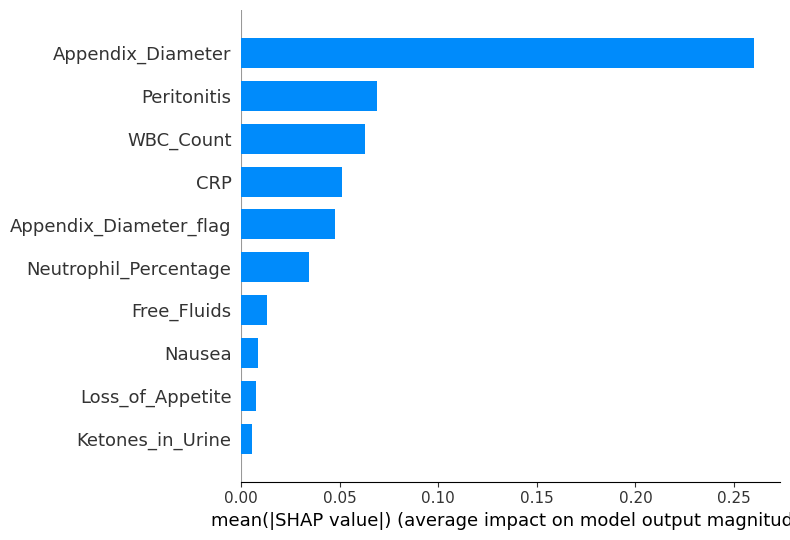

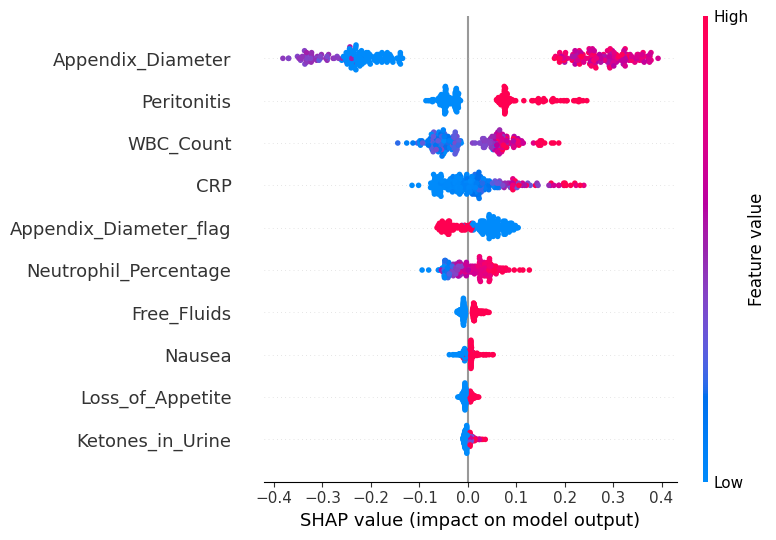

base value : 0.5002290503255425
                  Feature  Importance
7       Appendix_Diameter    0.468193
3               WBC_Count    0.128591
5                     CRP    0.105895
4   Neutrophil_Percentage    0.086945
9  Appendix_Diameter_flag    0.083223
2             Peritonitis    0.080056
0                  Nausea    0.015713
6        Ketones_in_Urine    0.011283
8             Free_Fluids    0.011240
1        Loss_of_Appetite    0.008861


In [19]:
test_df=pd.read_excel('../data_curation/dataset_tools.xlsx')

test_df = test_df[col_model]


x_test= test_df.drop(columns=['Diagnosis'])
y_test= test_df['Diagnosis']

dharma_imputer = Dharma.named_steps['imputer']
dharma_model = Dharma.named_steps['model']

x_imputed = dharma_imputer.transform(x_test)
base_value, feature_imp = explanation(model = dharma_model, x=x_imputed, max_display=10, class_index=1)

print (f'base value : {base_value}')
print (feature_imp)

2025-08-13 23:22:16,837 — INFO — Missing flag set for column: Appendix_Diameter


2025-08-13 23:22:16,849 — INFO — features list fed to the model: ['Nausea', 'Loss_of_Appetite', 'Peritonitis', 'WBC_Count', 'Neutrophil_Percentage', 'CRP', 'Ketones_in_Urine', 'Appendix_Diameter', 'Free_Fluids', 'Appendix_Diameter_flag']


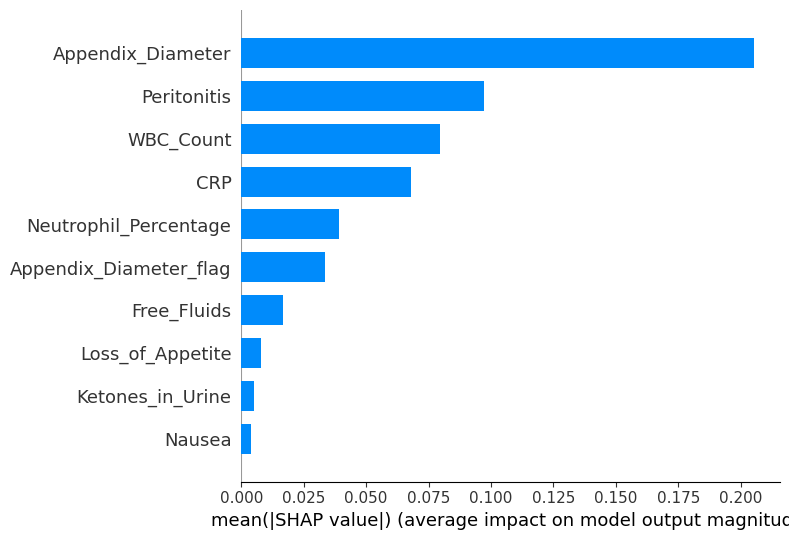

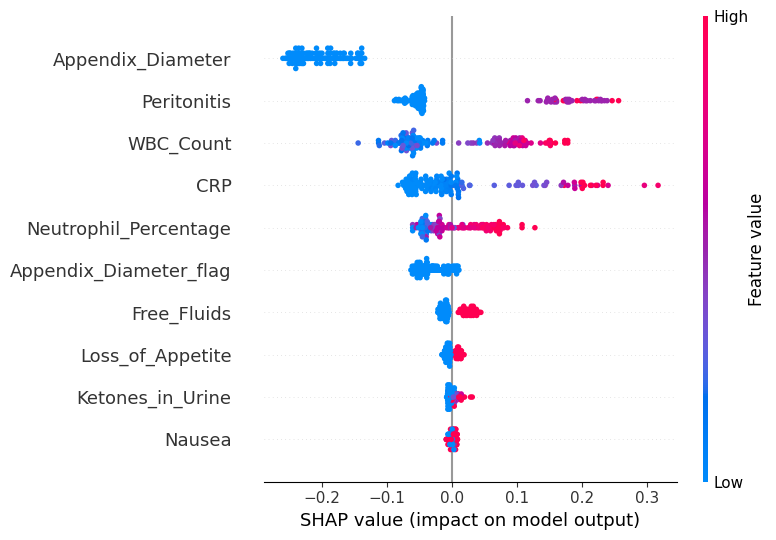

base value : 0.5002290503255425
                  Feature  Importance
7       Appendix_Diameter    0.468193
3               WBC_Count    0.128591
5                     CRP    0.105895
4   Neutrophil_Percentage    0.086945
9  Appendix_Diameter_flag    0.083223
2             Peritonitis    0.080056
0                  Nausea    0.015713
6        Ketones_in_Urine    0.011283
8             Free_Fluids    0.011240
1        Loss_of_Appetite    0.008861


In [20]:
df_nousg = pd.read_excel('../data_curation/no_usg.xlsx')

x_test0= df_nousg.drop(columns=['Diagnosis'])
y_test0= df_nousg['Diagnosis']

x_imputed0 = dharma_imputer.transform(x_test0)
base_value, feature_imp = explanation(model = dharma_model, x=x_imputed0, max_display=10, class_index=1)

print (f'base value : {base_value}')
print (feature_imp)

